Downloading: "file:///pscratch/sd/x/xchong/dinov3_test/dinov3_vit7b16_pretrain_lvd1689m-a955f4ea.pth" to ./.cache/hub/checkpoints/dinov3_vit7b16_pretrain_lvd1689m-a955f4ea.pth


100%|██████████| 25.0G/25.0G [00:29<00:00, 919MB/s]


embed dim 4096
interaction_indexes [9, 19, 29, 39]
patch_size 16
Downloading: "file:///pscratch/sd/x/xchong/dinov3_test/dinov3_vit7b16_ade20k_m2f_head-bf307cb1.pth" to ./.cache/hub/checkpoints/dinov3_vit7b16_ade20k_m2f_head-bf307cb1.pth


100%|██████████| 3.46G/3.46G [00:04<00:00, 797MB/s]
/pscratch/sd/x/xchong/envs/sam3/lib/python3.12/site-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(-0.5, 639.5, 479.5, -0.5)

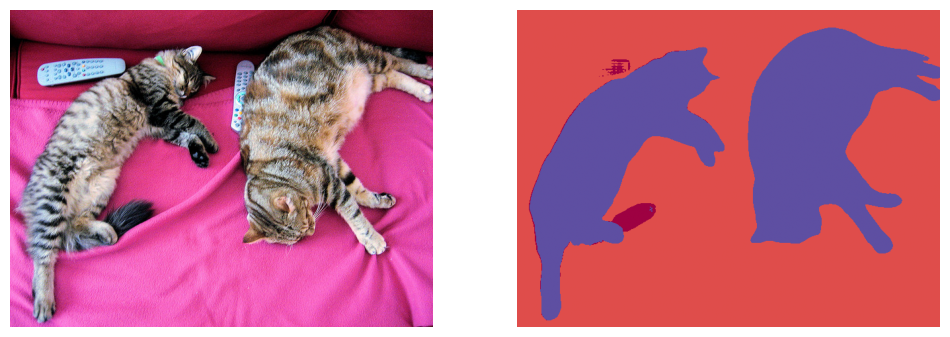

In [1]:
import sys
REPO_DIR="./dinov3"
sys.path.append(REPO_DIR)

import os
os.environ["TORCH_HOME"] = "./.cache"

from PIL import Image
import torch
from torchvision import transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from matplotlib import colormaps
from functools import partial
from dinov3.eval.segmentation.inference import make_inference


def get_img():
    import requests
    url = "http://images.cocodataset.org/val2017/000000039769.jpg"
    image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
    return image

def make_transform(resize_size: int | list[int] = 768):
    to_tensor = v2.ToImage()
    resize = v2.Resize((resize_size, resize_size), antialias=True)
    to_float = v2.ToDtype(torch.float32, scale=True)
    normalize = v2.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    )
    return v2.Compose([to_tensor, resize, to_float, normalize])

segmentor = torch.hub.load(REPO_DIR, 'dinov3_vit7b16_ms', source="local", weights="./dinov3_vit7b16_ade20k_m2f_head-bf307cb1.pth", backbone_weights="./dinov3_vit7b16_pretrain_lvd1689m-a955f4ea.pth")

img_size = 896
img  = get_img()
transform = make_transform(img_size)
with torch.inference_mode():
    with torch.autocast('cuda', dtype=torch.bfloat16):
        batch_img = transform(img)[None]
        pred_vit7b = segmentor(batch_img)  # raw predictions  
        # actual segmentation map
        segmentation_map_vit7b = make_inference(
            batch_img,
            segmentor,
            inference_mode="slide",
            decoder_head_type="m2f",
            rescale_to=(img.size[-1], img.size[-2]),
            n_output_channels=150,
            crop_size=(img_size, img_size),
            stride=(img_size, img_size),
            output_activation=partial(torch.nn.functional.softmax, dim=1),
        ).argmax(dim=1, keepdim=True)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img)
plt.axis("off")
plt.subplot(122)
plt.imshow(segmentation_map_vit7b[0,0].cpu(), cmap=colormaps["Spectral"])
plt.axis("off")

embed dim 4096
interaction_indexes [9, 19, 29, 39]
patch_size 16


(-0.5, 2559.5, 2559.5, -0.5)

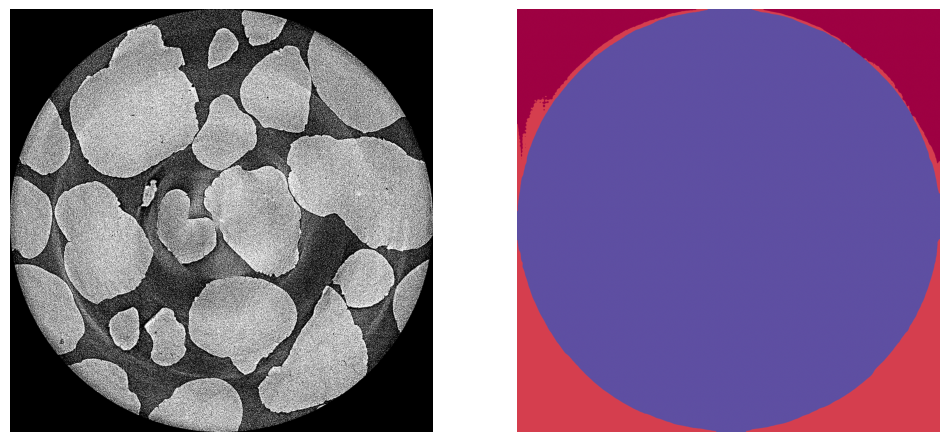

In [2]:
import sys
REPO_DIR="./dinov3"
sys.path.append(REPO_DIR)

import os
os.environ["TORCH_HOME"] = "./.cache"

from PIL import Image
import torch
from torchvision import transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from matplotlib import colormaps
from functools import partial
from dinov3.eval.segmentation.inference import make_inference


def get_img():
    import requests
    url = "20240425_112716_nist-sand-30-100_27keV_z8mm_n2625_00000.png"
    image = Image.open(url).convert("RGB")
    return image

def make_transform(resize_size: int | list[int] = 768):
    to_tensor = v2.ToImage()
    resize = v2.Resize((resize_size, resize_size), antialias=True)
    to_float = v2.ToDtype(torch.float32, scale=True)
    normalize = v2.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    )
    return v2.Compose([to_tensor, resize, to_float, normalize])

segmentor = torch.hub.load(REPO_DIR, 'dinov3_vit7b16_ms', source="local", weights="./dinov3_vit7b16_ade20k_m2f_head-bf307cb1.pth", backbone_weights="./dinov3_vit7b16_pretrain_lvd1689m-a955f4ea.pth")

img_size = 896
img  = get_img()
transform = make_transform(img_size)
with torch.inference_mode():
    with torch.autocast('cuda', dtype=torch.bfloat16):
        batch_img = transform(img)[None]
        pred_vit7b = segmentor(batch_img)  # raw predictions  
        # actual segmentation map
        segmentation_map_vit7b = make_inference(
            batch_img,
            segmentor,
            inference_mode="slide",
            decoder_head_type="m2f",
            rescale_to=(img.size[-1], img.size[-2]),
            n_output_channels=150,
            crop_size=(img_size, img_size),
            stride=(img_size, img_size),
            output_activation=partial(torch.nn.functional.softmax, dim=1),
        ).argmax(dim=1, keepdim=True)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img)
plt.axis("off")
plt.subplot(122)
plt.imshow(segmentation_map_vit7b[0,0].cpu(), cmap=colormaps["Spectral"])
plt.axis("off")

embed dim 4096
interaction_indexes [9, 19, 29, 39]
patch_size 16


(-0.5, 2559.5, 2559.5, -0.5)

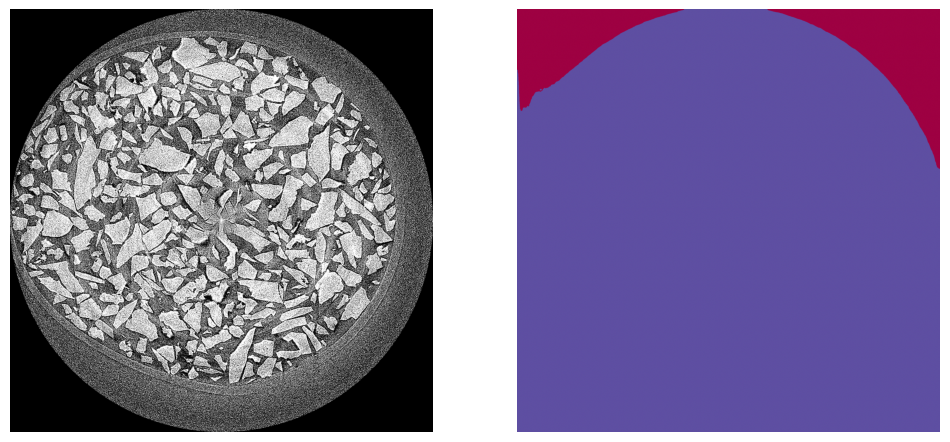

In [3]:
import sys
REPO_DIR="./dinov3"
sys.path.append(REPO_DIR)

import os
os.environ["TORCH_HOME"] = "./.cache"

from PIL import Image
import torch
from torchvision import transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from matplotlib import colormaps
from functools import partial
from dinov3.eval.segmentation.inference import make_inference


def get_img():
    import requests
    url = "20240425_153137_nist-sand-100-325_27keV_z8mm_n2625_00000.png"
    image = Image.open(url).convert("RGB")
    return image

def make_transform(resize_size: int | list[int] = 768):
    to_tensor = v2.ToImage()
    resize = v2.Resize((resize_size, resize_size), antialias=True)
    to_float = v2.ToDtype(torch.float32, scale=True)
    normalize = v2.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    )
    return v2.Compose([to_tensor, resize, to_float, normalize])

segmentor = torch.hub.load(REPO_DIR, 'dinov3_vit7b16_ms', source="local", weights="./dinov3_vit7b16_ade20k_m2f_head-bf307cb1.pth", backbone_weights="./dinov3_vit7b16_pretrain_lvd1689m-a955f4ea.pth")

img_size = 896
img  = get_img()
transform = make_transform(img_size)
with torch.inference_mode():
    with torch.autocast('cuda', dtype=torch.bfloat16):
        batch_img = transform(img)[None]
        pred_vit7b = segmentor(batch_img)  # raw predictions  
        # actual segmentation map
        segmentation_map_vit7b = make_inference(
            batch_img,
            segmentor,
            inference_mode="slide",
            decoder_head_type="m2f",
            rescale_to=(img.size[-1], img.size[-2]),
            n_output_channels=150,
            crop_size=(img_size, img_size),
            stride=(img_size, img_size),
            output_activation=partial(torch.nn.functional.softmax, dim=1),
        ).argmax(dim=1, keepdim=True)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img)
plt.axis("off")
plt.subplot(122)
plt.imshow(segmentation_map_vit7b[0,0].cpu(), cmap=colormaps["Spectral"])
plt.axis("off")

In [ ]:
import sys
REPO_DIR = "./dinov3"
sys.path.append(REPO_DIR)

import os
os.environ["TORCH_HOME"] = "./.cache"  # torch.hub cache location (relative to current folder)

from PIL import Image
import torch
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from matplotlib import colormaps
from functools import partial
from dinov3.eval.segmentation.inference import make_inference


def get_img():
    # local file path
    path = "20240425_112716_nist-sand-30-100_27keV_z8mm_n2625_00000.png"
    image = Image.open(path).convert("RGB")
    return image


def make_transform(resize_size: int | list[int] = 768):
    to_tensor = v2.ToImage()
    resize = v2.Resize((resize_size, resize_size), antialias=True)
    to_float = v2.ToDtype(torch.float32, scale=True)
    normalize = v2.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
    )
    return v2.Compose([to_tensor, resize, to_float, normalize])


segmentor = torch.hub.load(
    REPO_DIR,
    "dinov3_vit7b16_ms",
    source="local",
    weights="./dinov3_vit7b16_ade20k_m2f_head-bf307cb1.pth",
    backbone_weights="./dinov3_vit7b16_pretrain_lvd1689m-a955f4ea.pth",
)

# ---- minimal + safe device selection (Mac M-series => mps) ----
device = "mps" if torch.backends.mps.is_available() else "cpu"
segmentor = segmentor.to(device).eval()

img_size = 896
img = get_img()
transform = make_transform(img_size)

with torch.inference_mode():
    # ---- minimal fix: don't autocast 'cuda' on Mac ----
    # On MPS, bfloat16 support may vary; float16 is usually safer.
    amp_dtype = torch.float16 if device == "mps" else torch.bfloat16
    with torch.autocast(device_type=device, dtype=amp_dtype):
        batch_img = transform(img)[None].to(device)

        pred_vit7b = segmentor(batch_img)  # raw predictions

        # ---- MINIMAL ADD: DINOv3 feature map from backbone ----
        feats = segmentor.backbone(batch_img)  # typically list of (B, C, H, W)
        feat = feats[-1][0]                    # last level, first batch: (C, H, W)
        feat_map = feat.mean(dim=0).float().cpu()  # (H, W)

        # ---- segmentation map ----
        segmentation_map_vit7b = make_inference(
            batch_img,
            segmentor,
            inference_mode="slide",
            decoder_head_type="m2f",
            rescale_to=(img.size[-1], img.size[-2]),
            n_output_channels=150,
            crop_size=(img_size, img_size),
            stride=(img_size, img_size),
            output_activation=partial(torch.nn.functional.softmax, dim=1),
        ).argmax(dim=1, keepdim=True)

# ---- plotting ----
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(img)
plt.title("Input")
plt.axis("off")

plt.subplot(132)
plt.imshow(feat_map, cmap="viridis")
plt.title("DINOv3 feature map (mean over channels)")
plt.axis("off")

plt.subplot(133)
plt.imshow(segmentation_map_vit7b[0, 0].cpu(), cmap=colormaps["Spectral"])
plt.title("Segmentation")
plt.axis("off")

plt.show()


embed dim 4096
interaction_indexes [9, 19, 29, 39]
patch_size 16
